In [2]:
%matplotlib inline
import wandb
import matplotlib.pyplot as plt
import pandas as pd
import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

# Read data from wandb api or alternatively from text file

API key must be set up in command line using
$ wandb login

In [3]:
api = wandb.Api()
resnet15 = api.run("jer2ig/yoloclassify/2lhcg599")
resnet50 = api.run("jer2ig/yoloclassify/3ixwatb2")
resnet101 = api.run("jer2ig/yoloclassify/2gdg59rn")
resnet152 = api.run("jer2ig/yoloclassify/1sma7ji8")

# Plot data

C:\Users\Julius\AppData\Local\Temp/ipykernel_24560/17385962.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


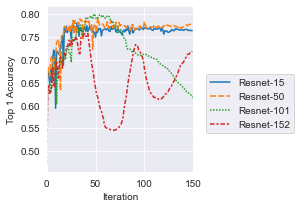

In [7]:
resnet15_hist = resnet15.history(x_axis="_step", pandas=(True), stream="default")
resnet15_hist = resnet15_hist.rename(columns=lambda c: "resnet15:"+str(c))
resnet50_hist = resnet50.history(x_axis="_step", pandas=(True), stream="default")
resnet50_hist = resnet50_hist.rename(columns=lambda c: "resnet150:"+str(c))
resnet101_hist = resnet101.history(x_axis="_step", pandas=(True), stream="default")
resnet101_hist = resnet101_hist.rename(columns=lambda c: "resnet101:"+str(c))
resnet152_hist = resnet152.history(x_axis="_step", pandas=(True), stream="default")
resnet152_hist = resnet152_hist.rename(columns=lambda c: "resnet152:"+str(c))


runs = pd.concat([resnet15_hist, resnet50_hist, resnet101_hist, resnet152_hist], axis=1)

fig, ax = plt.subplots(1, 1, figsize=(3, 3))

sns.lineplot(data=runs.filter(regex="accuracy_top1"),legend=None, ax=ax)
ax.set_xlabel("Iteration")
ax.set_ylabel("Top 1 Accuracy")
#ax.set_ylim(0,1)
ax.set_xlim(0,150)

fig.tight_layout()
fig.legend(labels=["Resnet-15","Resnet-50", "Resnet-101", "Resnet-152"],loc='right', bbox_to_anchor=(1.40, 0.5), bbox_transform=plt.gcf().transFigure)
fig.show()
fig.savefig('acc_classification_r.pdf', bbox_inches='tight')


C:\Users\Julius\AppData\Local\Temp/ipykernel_24560/859195835.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


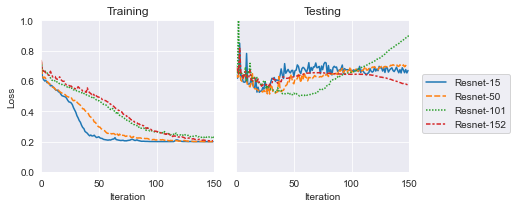

In [8]:
fig, ax = plt.subplots(1, 2,sharey='row',sharex= 'col', figsize=(6, 3))

ax[0].set_title("Training")
ax[1].set_title("Testing")

sns.lineplot(data=runs.filter(regex="train/loss"),legend=None, ax=ax[0])
ax[0].set_ylabel("Loss")
ax[0].set_xlabel("Iteration")
ax[0].set_ylim(0,1)
ax[0].set_xlim(0,150)
sns.lineplot(data=runs.filter(regex="test/loss"),legend=None, ax=ax[1])
ax[1].set_xlabel("Iteration")
ax[1].set_xlim(0,150)


#fig.legend(labels=["yolo5n","yolo5m"],loc='lower center', bbox_to_anchor=(0.5, -0.05))
fig.tight_layout()
fig.legend(labels=["Resnet-15","Resnet-50", "Resnet-101", "Resnet-152"],loc='right', bbox_to_anchor=(1.2, 0.5), bbox_transform=plt.gcf().transFigure)
fig.show()
#fig.subplots_adjust(bottom=0.2)
fig.savefig('loss_classification_r.pdf', bbox_inches='tight')

In [9]:
runs.filter(regex="accuracy_top1").max()

resnet15:metrics/accuracy_top1     0.780038
resnet150:metrics/accuracy_top1    0.792467
resnet101:metrics/accuracy_top1    0.800377
resnet152:metrics/accuracy_top1    0.757815
dtype: float64